<a href="https://colab.research.google.com/github/Selmabanzema/Daily-Sea-Ice-Extent-Data/blob/main/Ice_DataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Dosyayi indirelim
from google.colab import files

uploaded = files.upload()


Saving seaice.csv to seaice.csv


In [ ]:
!pip install kaggle
import pandas as pd

# Dosyayı DataFrame'e yükleyelim
df = pd.read_csv(next(iter(uploaded)))

In [ ]:
#Gerekli kutuphaneleri indirelim
!pip install seaborn
!pip install scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split

In [ ]:
#Veri setimizi gorelim

In [ ]:
df

,Year,Month,Day,Extent,Missing,Source Data,hemisphere
0,1978,10,26,10.231,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsid...,north
1,1978,10,28,10.420,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsid...,north
2,1978,10,30,10.557,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsid...,north
3,1978,11,1,10.670,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsid...,north
4,1978,11,3,10.777,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsid...,north
...,...,...,...,...,...,...,...
26349,2019,5,27,10.085,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...,south
26350,2019,5,28,10.078,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...,south
26351,2019,5,29,10.219,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...,south
26352,2019,5,30,10.363,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...,south


In [ ]:
#veri setimizie hizli bir goz atalim
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26354 entries, 0 to 26353
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          26354 non-null  int64  
 1    Month        26354 non-null  int64  
 2    Day          26354 non-null  int64  
 3        Extent   26354 non-null  float64
 4       Missing   26354 non-null  float64
 5    Source Data  26354 non-null  object 
 6   hemisphere    26354 non-null  object 
dtypes: float64(2), int64(3), object(2)
memory usage: 1.4+ MB


In [ ]:
#İslem kolayligi acisindan headerleri degistirelim
Header= ["Year","Month","Day","Extent","Missing","Source Data","hemisphere"]
df.columns=Header
df

,Year,Month,Day,Extent,Missing,Source Data,hemisphere
0,1978,10,26,10.231,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsid...,north
1,1978,10,28,10.420,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsid...,north
2,1978,10,30,10.557,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsid...,north
3,1978,11,1,10.670,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsid...,north
4,1978,11,3,10.777,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsid...,north
...,...,...,...,...,...,...,...
26349,2019,5,27,10.085,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...,south
26350,2019,5,28,10.078,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...,south
26351,2019,5,29,10.219,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...,south
26352,2019,5,30,10.363,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...,south


In [ ]:
#Source data sutununu atalim
df.drop("Source Data",axis=1,inplace=True)

In [ ]:
#String sütünlerini sayısal degerlere cevirelim
df_class=pd.get_dummies(df["hemisphere"],prefix="x")
df=pd.concat([df,df_class],axis=1)
df.drop("hemisphere",axis=1,inplace=True)

In [ ]:
df

,Year,Month,Day,Extent,Missing,x_north,x_south
0,1978,10,26,10.231,0.0,1,0
1,1978,10,28,10.420,0.0,1,0
2,1978,10,30,10.557,0.0,1,0
3,1978,11,1,10.670,0.0,1,0
4,1978,11,3,10.777,0.0,1,0
...,...,...,...,...,...,...,...
26349,2019,5,27,10.085,0.0,0,1
26350,2019,5,28,10.078,0.0,0,1
26351,2019,5,29,10.219,0.0,0,1
26352,2019,5,30,10.363,0.0,0,1


In [ ]:
df["x_north"]=df["x_north"].astype(int)
df["x_south"]=df["x_south"].astype(int)

In [ ]:
pd.isnull(df).any()

Year       False
Month      False
Day        False
Extent     False
Missing    False
x_north    False
x_south    False
dtype: bool

In [ ]:
#Her sınıfa düşen örnek sayısını inceleyelim
df['Year'].value_counts()  #ayrı ayrı inceleyelim

2008    732
2016    732
1996    732
2012    732
2004    732
1992    732
2000    732
2006    730
2002    730
2003    730
2005    730
1999    730
2007    730
2009    730
2010    730
2011    730
2013    730
2014    730
2015    730
2001    730
1998    730
2017    730
2018    730
1997    730
1995    730
1994    730
1993    730
1991    730
1990    730
1989    730
1988    708
1987    440
1986    366
1984    366
1983    366
1981    366
1980    366
1985    364
1982    364
1979    364
2019    302
1978     68
Name: Year, dtype: int64

In [ ]:
df['Month'].value_counts()

3     2264
5     2262
10    2238
1     2238
8     2212
12    2206
7     2202
11    2190
4     2190
9     2160
6     2130
2     2062
Name: Month, dtype: int64

In [ ]:
df["Extent"].value_counts()

15.107    10
15.396     9
14.404     9
14.656     9
14.268     9
          ..
11.831     1
11.266     1
11.244     1
10.369     1
8.472      1
Name: Extent, Length: 13078, dtype: int64

In [ ]:
#Aykiri degerleri tespit edelim
q1=df["Year"].quantile(0.25)
q3=df["Year"].quantile(0.75)
R=q3-q1
upper_limit=q1+(1.5)*R
lower_limit=q3-(1.5)*R

outlier=np.where((df["Year"]>lower_limit) & (df["Year"]< upper_limit)==False)
outlier
#Kutu grafiğinde görüldüğü üzere herhangi bir aykırı değer tespit edilmemiştir

(array([    0,     1,     2, ..., 26351, 26352, 26353]),)

In [ ]:
df

,Year,Month,Day,Extent,Missing,x_north,x_south
0,1978,10,26,10.231,0.0,1,0
1,1978,10,28,10.420,0.0,1,0
2,1978,10,30,10.557,0.0,1,0
3,1978,11,1,10.670,0.0,1,0
4,1978,11,3,10.777,0.0,1,0
...,...,...,...,...,...,...,...
26349,2019,5,27,10.085,0.0,0,1
26350,2019,5,28,10.078,0.0,0,1
26351,2019,5,29,10.219,0.0,0,1
26352,2019,5,30,10.363,0.0,0,1


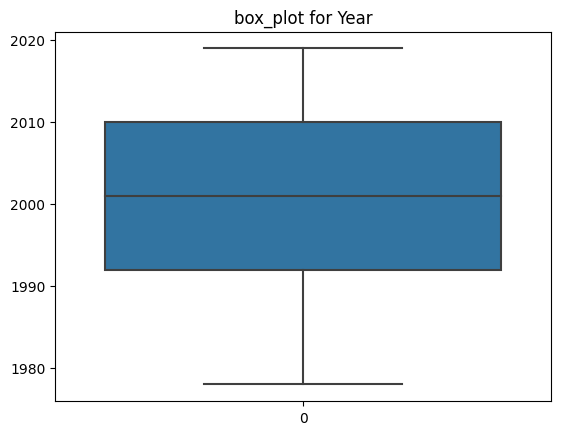

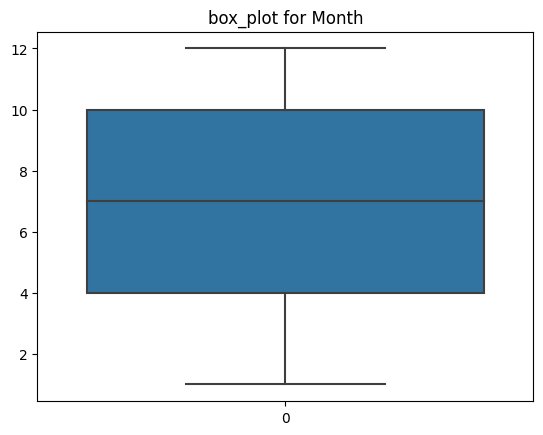

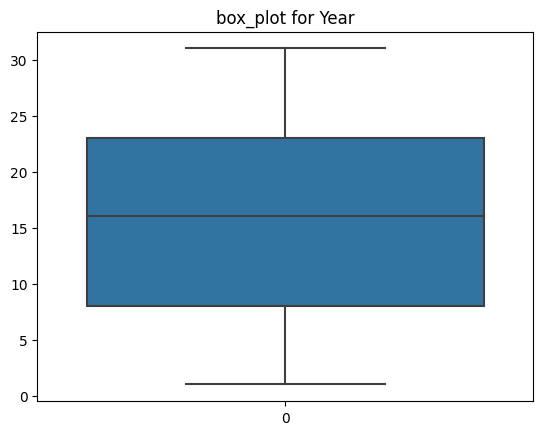

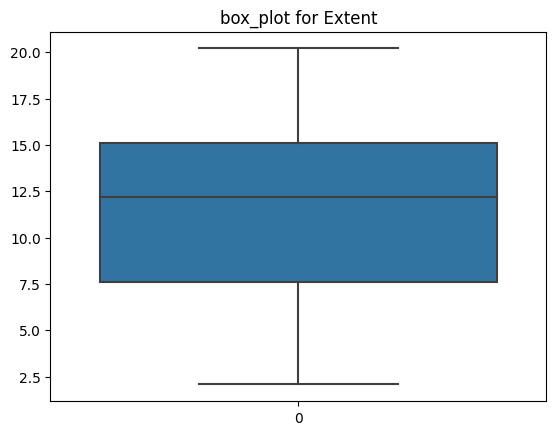

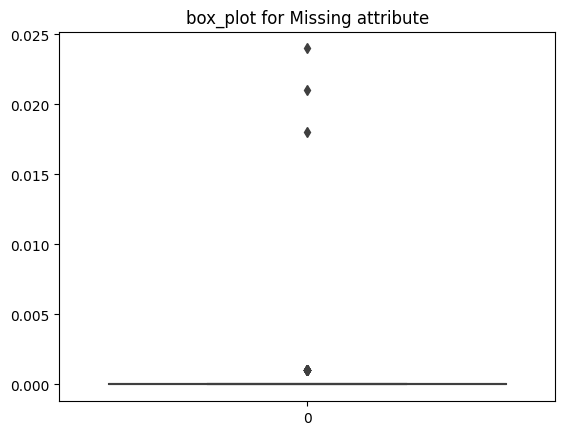

In [ ]:
#Kutu grafigini gorelim onemli oznitelikler icin
sns.boxplot(df.Year)
plt.title("box_plot for Year")
plt.show()
sns.boxplot(df.Month)
plt.title("box_plot for Month")

plt.show()

sns.boxplot(df.Day)
plt.title("box_plot for Year")

plt.show()

sns.boxplot(df.Extent)
plt.title("box_plot for Extent")

plt.show()

sns.boxplot(df.Missing)
plt.title("box_plot for Missing attribute")

plt.show()

In [ ]:
#Yil bazinda kaplama alanini gorelim ve ortalamasini alalim
df_year=df.groupby("Year")["Extent"].mean()
df_year

Year
1978    12.976838
1979    12.019349
1980    11.785219
1981    11.776148
1982    12.048755
1983    11.852904
1984    11.681139
1985    11.810214
1986    11.639773
1987    12.149411
1988    11.889179
1989    11.696267
1990    11.551718
1991    11.647066
1992    11.754549
1993    11.671496
1994    11.892644
1995    11.604933
1996    11.804958
1997    11.528833
1998    11.747877
1999    11.726074
2000    11.627701
2001    11.636321
2002    11.292237
2003    11.683255
2004    11.600966
2005    11.300927
2006    11.116763
2007    11.080601
2008    11.608627
2009    11.490281
2010    11.409092
2011    10.992034
2012    11.205268
2013    11.710360
2014    11.783311
2015    11.489959
2016    10.682796
2017    10.570814
2018    10.632312
2019     9.243646
Name: Extent, dtype: float64

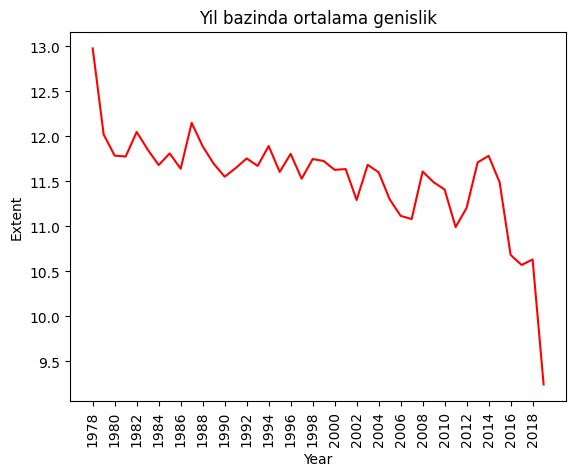

<Figure size 1000x2000 with 0 Axes>

In [ ]:
#Verilerimizi gorsellestirelim
df_year.plot(kind="line",color="r")
plt.title("Yil bazinda ortalama genislik")
plt.xlabel("Year")
plt.ylabel("Extent")
plt.xticks(np.arange(1978,2020,2))
plt.xticks(rotation='vertical')
plt.figure(figsize=(10, 20))

plt.show()

In [ ]:
#simdi ise ay bazinda artisi ve azalisi goruntueleyelim
Feature=["Year","Month","Day","Extent"]
df_graph=df.loc[:,Feature]
df_graph

,Year,Month,Day,Extent
0,1978,10,26,10.231
1,1978,10,28,10.420
2,1978,10,30,10.557
3,1978,11,1,10.670
4,1978,11,3,10.777
...,...,...,...,...
26349,2019,5,27,10.085
26350,2019,5,28,10.078
26351,2019,5,29,10.219
26352,2019,5,30,10.363


In [ ]:
mean_for_month=df_graph.groupby("Month")["Extent"].mean()
df_mean=pd.DataFrame(mean_for_month)
df_mean

,Extent
Month,
1,9.587706
2,9.057401
3,9.621926
4,10.678099
5,11.637163
6,12.476158
7,12.563403
8,12.288473
9,12.265863


Text(0.5, 1.0, 'gun bazinda 1978-2019 arasinda gozlemlenen ortalama Extend miktari')

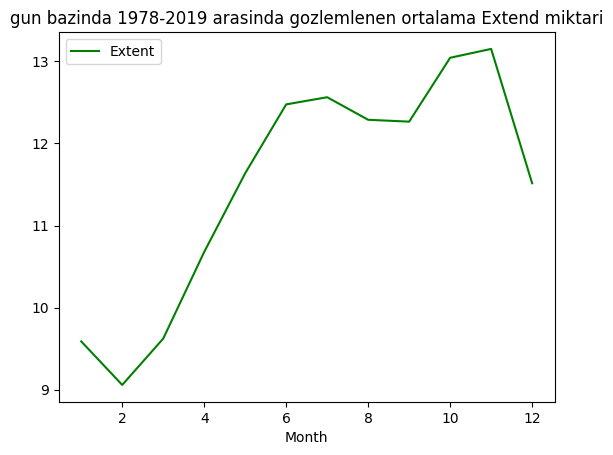

In [ ]:
df_mean.plot(kind="line",color="g")
plt.title("gun bazinda 1978-2019 arasinda gozlemlenen ortalama Extend miktari")

In [ ]:
#Simdi ise yil bazinda en cok deniz buzun kapsadigi alani goruntuleyelim
df_top = df.sort_values(by="Extent", ascending=False)
df_top["Year"].unique()
#Simdi sadece ilk 4 yili alalım yani 2014,2013,2012,2016
df_top = df_top.drop(df_top[(df_top["Year"] != 2014) & (df_top["Year"] != 2013) & (df_top["Year"] != 2012) & (df_top["Year"] != 2006)].index)
df_top

,Year,Month,Day,Extent,Missing,x_north,x_south
24639,2014,9,20,20.201,0.0,0,1
24637,2014,9,18,20.178,0.0,0,1
24638,2014,9,19,20.168,0.0,0,1
24640,2014,9,21,20.140,0.0,0,1
24636,2014,9,17,20.094,0.0,0,1
...,...,...,...,...,...,...,...
21508,2006,2,23,2.543,0.0,0,1
21503,2006,2,18,2.539,0.0,0,1
21506,2006,2,21,2.513,0.0,0,1
21504,2006,2,19,2.512,0.0,0,1


In [ ]:
df_top["Year"].unique() #kontrol edelim

array([2014, 2013, 2012, 2006])

In [ ]:
#simdi veriyi ayiklayalim ve ortalama ile verileri birlestirelim
df_top_4 = df_top.groupby(["Year", "Month"])["Extent"].mean().reset_index()
df_top_4

,Year,Month,Extent
0,2006,1,8.814565
1,2006,2,8.488179
2,2006,3,8.817790
3,2006,4,9.958133
4,2006,5,10.986806
5,2006,6,12.132133
6,2006,7,12.286984
7,2006,8,12.296629
8,2006,9,12.478267
9,2006,10,13.136855


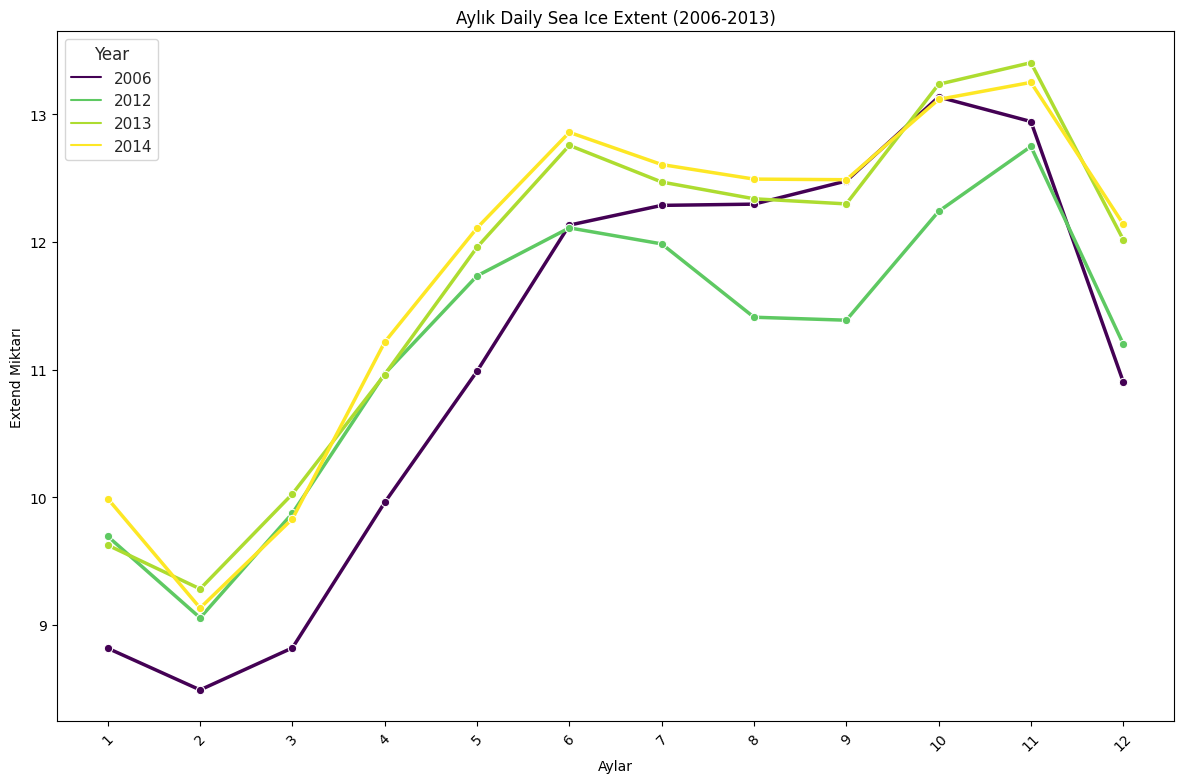

In [ ]:
plt.figure(figsize=(12, 8))
plt.xticks(range(1, 13, 1))
sns.set_theme(style="whitegrid")
sns.lineplot(x='Month', y='Extent', data=df_top_4, hue='Year', marker='o', palette='viridis', linewidth=2.5)
plt.title('Aylık Daily Sea Ice Extent (2006-2013)')
plt.xlabel('Aylar')
plt.ylabel('Extend Miktarı')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#Son olarak son 3 yilda gerceklesen genisleme miktarini hesaplayalım
df_son_uc=df.loc[df["Year"]>= 2016]
df_son_uc

,Year,Month,Day,Extent,Missing,x_north,x_south
11930,2016,1,1,12.721,0.0,1,0
11931,2016,1,2,12.806,0.0,1,0
11932,2016,1,3,12.790,0.0,1,0
11933,2016,1,4,12.829,0.0,1,0
11934,2016,1,5,12.874,0.0,1,0
...,...,...,...,...,...,...,...
26349,2019,5,27,10.085,0.0,0,1
26350,2019,5,28,10.078,0.0,0,1
26351,2019,5,29,10.219,0.0,0,1
26352,2019,5,30,10.363,0.0,0,1


In [ ]:
df_son_uc=df_son_uc.groupby(["Year","Month"])["Extent"].mean()

In [ ]:
df_son_uc=pd.DataFrame(df_son_uc)

In [ ]:
df_son_uc

Extent
Year Month           
2016 1       9.072952
     2       8.496121
     3       9.234484
     4      10.451433
     5      11.013403
     6      11.827417
     7      11.980694
     8      11.631290
     9      11.339283
     10     11.770823
     11     11.440250
     12      9.869403
2017 1       8.487016
     2       8.203679
     3       8.494565
     4       9.594700
     5      10.822145
     6      11.582583
     7      11.618016
     8      11.349774
     9      11.363900
     10     12.271613
     11     12.302933
     12     10.612371
2018 1       8.592032
     2       8.120071
     3       8.913161
     4       9.859167
     5      10.751419
     6      11.777133
     7      11.940758
     8      11.473726
     9      11.296267
     10     11.859484
     11     12.407417
     12     10.444661
2019 1       8.693500
     2       8.527286
     3       8.858065
     4       9.581617
     5      10.499339

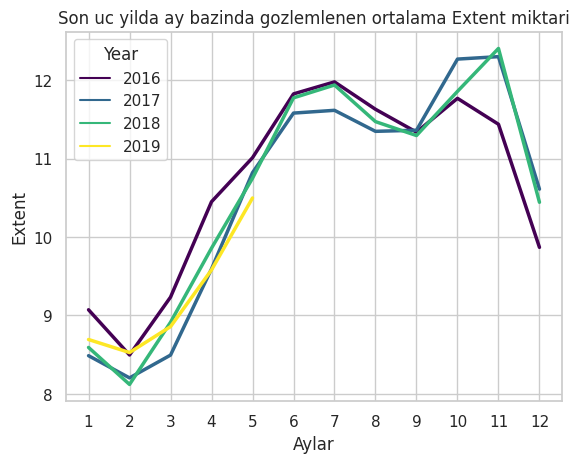

In [ ]:
sns.lineplot(x="Month",y="Extent",hue="Year",data=df_son_uc,palette='viridis', linewidth=2.5)
plt.title("Son uc yilda ay bazinda gozlemlenen ortalama Extent miktari")
plt.xlabel("Aylar")
plt.ylabel("Extent")
plt.xticks(np.arange(1,13,1))
plt.show()

<Axes: xlabel='Month', ylabel='Extent'>

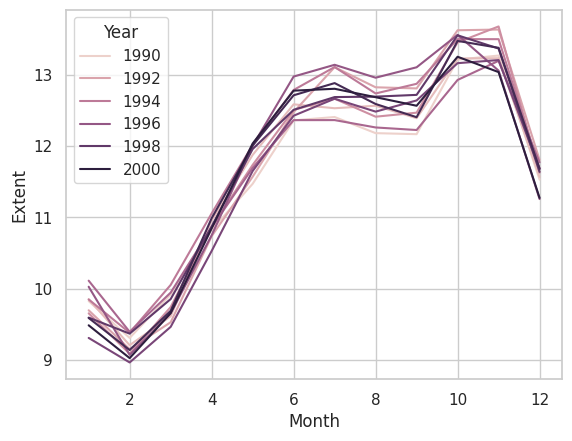

In [ ]:
#1990-2000 #2000-2009   #2009-2019 arasına bakalım
df_90_20 = df.loc[(df["Year"] >= 1990) & (df["Year"] <= 2000)]
df_90_200=df_90_20.groupby(["Year","Month"])["Extent"].mean()
df_90_200=pd.DataFrame(df_90_200)
sns.lineplot(x="Month",y="Extent",hue="Year",data=df_90_200)

<Axes: xlabel='Month', ylabel='Extent'>

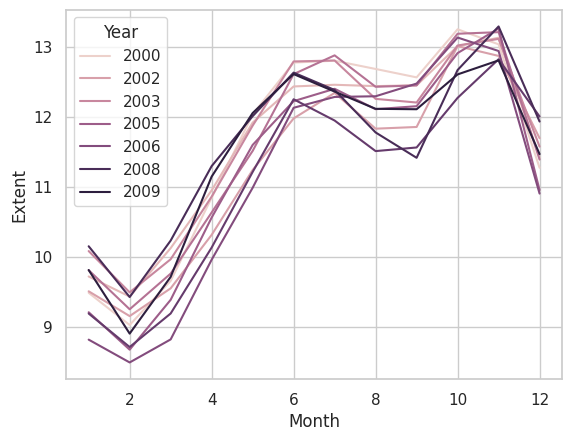

In [ ]:
#2000-2009 a bakalım
df_200_2009 = df.loc[(df["Year"] >= 2000) & (df["Year"] <= 2009)]
df_200_2009=df_200_2009.groupby(["Year","Month"])["Extent"].mean()
df_200_2009=pd.DataFrame(df_200_2009)
sns.lineplot(x="Month",y="Extent",hue="Year",data=df_200_2009)

<Axes: xlabel='Month', ylabel='Extent'>

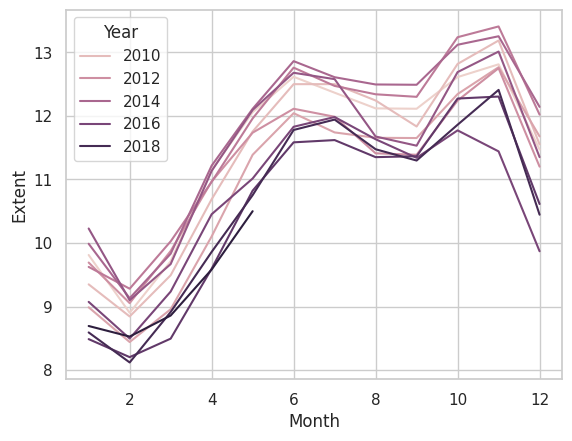

In [ ]:
#2009-2019 a bakalım
df_2010_2019 = df.loc[(df["Year"] >= 2009) & (df["Year"] <= 2019)]
df_2010_2019=df_2010_2019.groupby(["Year","Month"])["Extent"].mean()
df_2010_2019=pd.DataFrame(df_2010_2019)
sns.lineplot(x="Month",y="Extent",hue="Year",data=df_2010_2019)

In [ ]:
#Simdi modellemeye baslayabiliriz
#Hedef degiskenimiz Extent
#son kez veri setimizi tekrar gorelim
df

,Year,Month,Day,Extent,Missing,x_north,x_south
0,1978,10,26,10.231,0.0,1,0
1,1978,10,28,10.420,0.0,1,0
2,1978,10,30,10.557,0.0,1,0
3,1978,11,1,10.670,0.0,1,0
4,1978,11,3,10.777,0.0,1,0
...,...,...,...,...,...,...,...
26349,2019,5,27,10.085,0.0,0,1
26350,2019,5,28,10.078,0.0,0,1
26351,2019,5,29,10.219,0.0,0,1
26352,2019,5,30,10.363,0.0,0,1


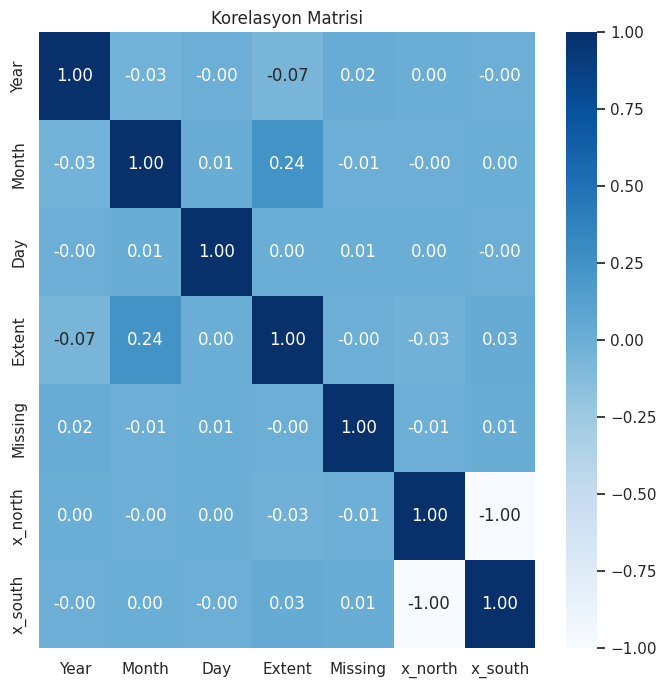

In [ ]:
#Degiskenlerin arasindaki iliskileri anlamak icin korelasyon matrisi bulalim
cor_matrix = df.corr()
plt.figure(figsize=(8, 8))  # Farklı bir boyut belirtmek için figsize ekledim
sns.heatmap(cor_matrix, cmap='Blues', annot=True, fmt=".2f")
plt.title("Korelasyon Matrisi")
plt.show()

In [ ]:
#Deneme amacli yil bazinda Extenti tahminleyelim (in of sample)
lm=LinearRegression()
x=df[["Month"]]
y=df["Extent"]
lm.fit(x,y)
yhat=lm.predict(x)
lm.score(x,y)

0.05745662255269701

In [ ]:
#cok buyuk bir hata orani ile karsilastik, demek ki yil sütünü tek basina yeterli degilmiş, o yuzden yil ve ay bazinda tahminleme yapalım
z=df[["Year","Month"]]
lm.fit(z,y)
lm.predict(z)
lm.score(z,y)

0.06082107002602555

In [ ]:
#Simdi ise yil ay ve gun ile birlikte tahminleme yapalim ve hatayi yakalayalim
z_1=df[["Month","Year","Day"]]
lm.fit(z_1,y)
yhat=lm.predict(z_1)
print(lm.score(z_1,y))
print(mean_squared_error(yhat,y))

0.06082245571354383
19.973758214652122


In [ ]:
#Simdi ise modeli ayiralim
y_data=df["Extent"]
x_data=df.drop("Extent",axis=1)
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.1,random_state=1)

In [ ]:
#linear regression ile tahminleme yapalim ve dogruluk hatasini bulalim
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
lm.fit(x_train,y_train)
yhat=lm.predict(x_test)
print("Lineer regression modelinin egitim datası skoru:",lm.score(x_train,y_train))
print("Lineer regression modelinin test datası skoru:",lm.score(x_test,y_test))
print("Lineer regression modelinin gercek degerle tahmin edilen degerlerin uyusması oranı",r2_score(yhat,y_test))
mae = mean_absolute_error(y_test, yhat)
print("Mutlak Hata:",mae)

Lineer regression modelinin egitim datası skoru: 0.06080002904911441
Lineer regression modelinin test datası skoru: 0.06878892890376231
Lineer regression modelinin gercek degerle tahmin edilen degerlerin uyusması oranı -14.896190452752485
Mutlak Hata: 4.03072574349105


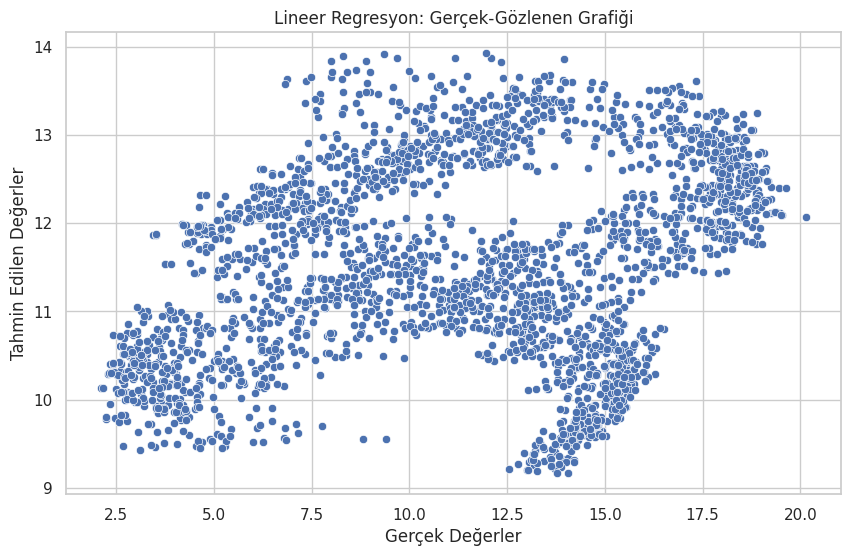

In [ ]:
#Oldukca dusuk bir basair orani elde ettik, birde verilerimizi lineerlestirerek deneyelim
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=yhat)
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin Edilen Değerler")
plt.title("Lineer Regresyon: Gerçek-Gözlenen Grafiği")
plt.show()

In [ ]:
#Verileri lineerlestirelim ve o sekilde tahminleme yapalım
pr=PolynomialFeatures(degree=4)
pr_x_train=pr.fit_transform(x_train)
pr_x_test=pr.fit_transform(x_test)
lm.fit(pr_x_train,y_train)
yhat=lm.predict(pr_x_test)
print("Lineerleştirilmiş regression modelinin egitim datası skoru:",lm.score(pr_x_train,y_train))
print("Lineerleştirilmiş regression modelinin test datası skoru:",lm.score(pr_x_test,y_test))
print("Lineerleştirilmiş regression modelinin gercek degerle tahmin edilen degerlerin uyusması oranı",r2_score(yhat,y_test))
print("Mutlak hata:", mean_absolute_error(y_test, yhat))

Lineerleştirilmiş regression modelinin egitim datası skoru: 0.9755608182383548
Lineerleştirilmiş regression modelinin test datası skoru: 0.9758273949619923
Lineerleştirilmiş regression modelinin gercek degerle tahmin edilen degerlerin uyusması oranı 0.9750616731579765
Mutlak hata: 0.5543717699148971


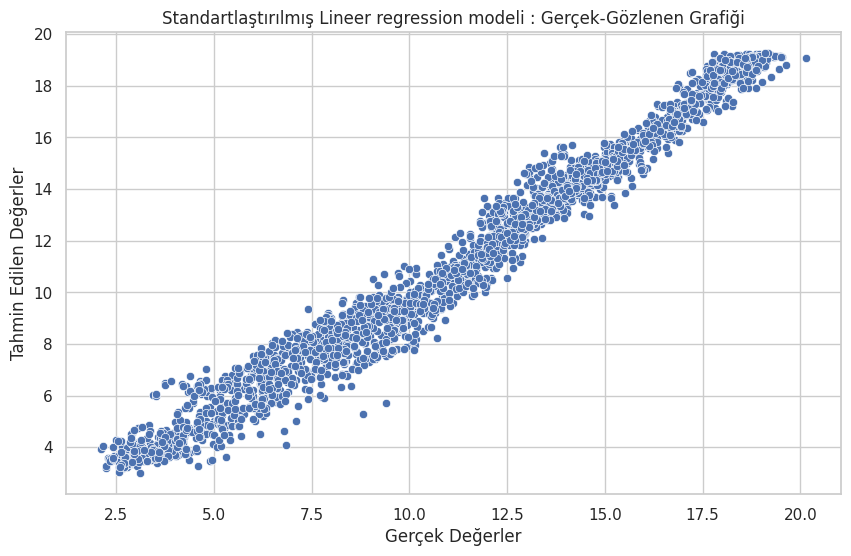

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=yhat)
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin Edilen Değerler")
plt.title("Standartlaştırılmış Lineer regression modeli : Gerçek-Gözlenen Grafiği")
plt.show()

In [ ]:
#Goruldugu uzere modelimiz daha iyi bir sonuc yakaladi,smdi ise KNN yöntemiyle tahminleme yapalim
#knn için k değerini belirleyeleim ve en iyi k değeriyle modeli egitelim ve sonculari gorelim
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

mean = []

for n in range(1, 10):
    ne = KNeighborsRegressor(n_neighbors=n)
    ne.fit(x_train, y_train)
    yhat = ne.predict(x_test)
    mse = mean_squared_error(y_test, yhat)
    mean.append(mse)

# En iyi skorun ve karşılık gelen k değerinin indeksini bulalım
best_score_index = np.argmin(mean)
best_k_value = best_score_index + 1  # Çünkü k değerleri 1'den başlıyor

# En iyi skoru ve k değerini yazdıralım
print("En iyi skor (MSE):", min(mean))
print("En iyi k değeri:", best_k_value)

En iyi skor (MSE): 0.7571542756449164
En iyi k değeri: 5


In [ ]:
#Test ve eğitim dataseti için sonuca bakalım, modelimiz iyi ogrenmis mi kontrol edelim
ne.fit(x_train,y_train)
print("Egitim verisinin sonucu:",ne.score(x_train,y_train))
print("Test verisinin sonucu:",ne.score(x_test,y_test))

r2 = r2_score(y_test, yhat)
print("R kare hatası:",r2)
mean = mean_squared_error(y_test, yhat)
print("ortalama hata:",mean)
mae = mean_absolute_error(y_test, yhat)
print("Mutlak hata:",mae)

Egitim verisinin sonucu: 0.9471121583584701
Test verisinin sonucu: 0.9275526396221592
R kare hatası: 0.9981946456656694
ortalama hata: 0.039544556525037924
Mutlak hata: 0.10940781487101667


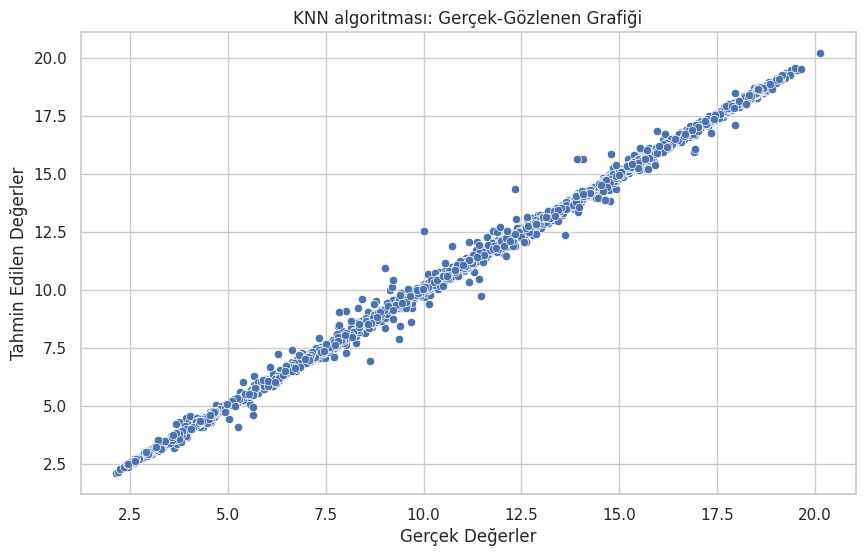

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=yhat)
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin Edilen Değerler")
plt.title("KNN algoritması: Gerçek-Gözlenen Grafiği")
plt.show()

In [ ]:
#Oldukca yuksek bir basari orani elde ettik simdi bir regression modeli daha deneyelim
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

dl = DecisionTreeRegressor()
dl.fit(x_train,y_train)
yhat=dl.predict(x_test)
print("Hata oranı")
print(mean_squared_error(y_test, yhat))
print("R kare hatası")
r2_score(y_test,yhat)

Hata oranı
0.039544556525037924
R kare hatası


0.9981946456656694

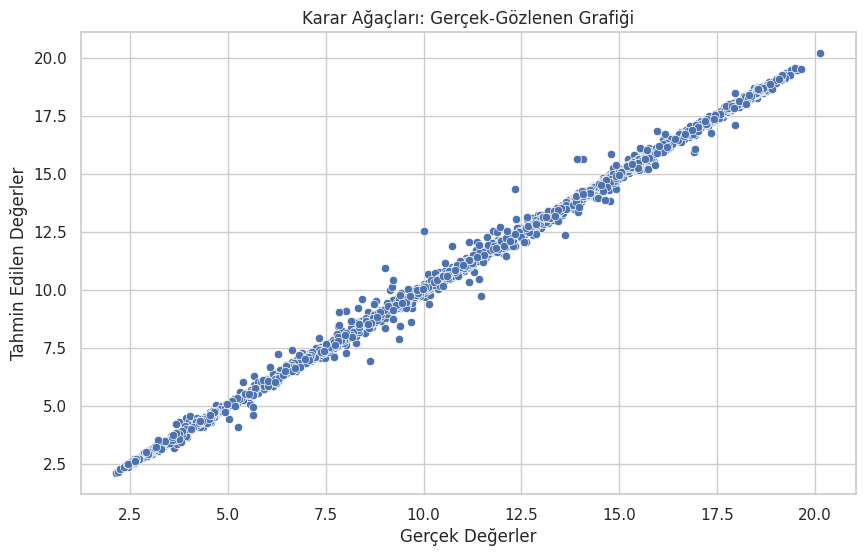

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=yhat)
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin Edilen Değerler")
plt.title("Karar Ağaçları: Gerçek-Gözlenen Grafiği")
plt.show()

In [ ]:
#Modelimizi daha iyi anlamak adına north ve south sütünlerini ayrı ayrı inceleyelim ve degerlendirelim:
df

,Year,Month,Day,Extent,Missing,x_north,x_south
0,1978,10,26,10.231,0.0,1,0
1,1978,10,28,10.420,0.0,1,0
2,1978,10,30,10.557,0.0,1,0
3,1978,11,1,10.670,0.0,1,0
4,1978,11,3,10.777,0.0,1,0
...,...,...,...,...,...,...,...
26349,2019,5,27,10.085,0.0,0,1
26350,2019,5,28,10.078,0.0,0,1
26351,2019,5,29,10.219,0.0,0,1
26352,2019,5,30,10.363,0.0,0,1


In [ ]:
df_north=df.loc[df["x_north"]==1]
df_north.drop("x_south",axis=1,inplace=True)
df_north

<ipython-input-47-a2fbb49e6869>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_north.drop("x_south",axis=1,inplace=True)


,Year,Month,Day,Extent,Missing,x_north
0,1978,10,26,10.231,0.0,1
1,1978,10,28,10.420,0.0,1
2,1978,10,30,10.557,0.0,1
3,1978,11,1,10.670,0.0,1
4,1978,11,3,10.777,0.0,1
...,...,...,...,...,...,...
13172,2019,5,27,11.747,0.0,1
13173,2019,5,28,11.672,0.0,1
13174,2019,5,29,11.652,0.0,1
13175,2019,5,30,11.594,0.0,1


In [ ]:
#Verimizi ayiklayalim
df_south=df[df["x_south"]==1]
df_south.drop("x_north",axis=1,inplace=True)
df_south

<ipython-input-48-d33f3e3f2a6a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_south.drop("x_north",axis=1,inplace=True)


,Year,Month,Day,Extent,Missing,x_south
13177,1978,10,26,17.624,0.0,1
13178,1978,10,28,17.803,0.0,1
13179,1978,10,30,17.670,0.0,1
13180,1978,11,1,17.527,0.0,1
13181,1978,11,3,17.486,0.0,1
...,...,...,...,...,...,...
26349,2019,5,27,10.085,0.0,1
26350,2019,5,28,10.078,0.0,1
26351,2019,5,29,10.219,0.0,1
26352,2019,5,30,10.363,0.0,1


In [ ]:
#1978-200 yili arasindaki performansi degerlendirelim
df_south_test=df_south[df_south["Year"].between(1978,2000)]
df_south_mean=df_south_test.groupby("Year")["Extent"].mean()
df_south_mean=pd.DataFrame(df_south_mean)
df_south_mean

,Extent
Year,
1978,13.466676
1979,11.719137
1980,11.236290
1981,11.416809
1982,11.658066
1983,11.369913
1984,11.449678
1985,11.633830
1986,11.071322


In [ ]:
df_north_test = df_north[df_north["Year"].between(1978, 2000)]
df_north_test

,Year,Month,Day,Extent,Missing,x_north
0,1978,10,26,10.231,0.0,1
1,1978,10,28,10.420,0.0,1
2,1978,10,30,10.557,0.0,1
3,1978,11,1,10.670,0.0,1
4,1978,11,3,10.777,0.0,1
...,...,...,...,...,...,...
6447,2000,12,27,13.160,0.0,1
6448,2000,12,28,13.244,0.0,1
6449,2000,12,29,13.320,0.0,1
6450,2000,12,30,13.340,0.0,1


In [ ]:
df_north_mean=df_north_test.groupby("Year")["Extent"].mean()
df_north_mean=pd.DataFrame(df_north_mean)
df_north_mean

,Extent
Year,
1978,12.487000
1979,12.319560
1980,12.334148
1981,12.135486
1982,12.439445
1983,12.335896
1984,11.912601
1985,11.986599
1986,12.208224


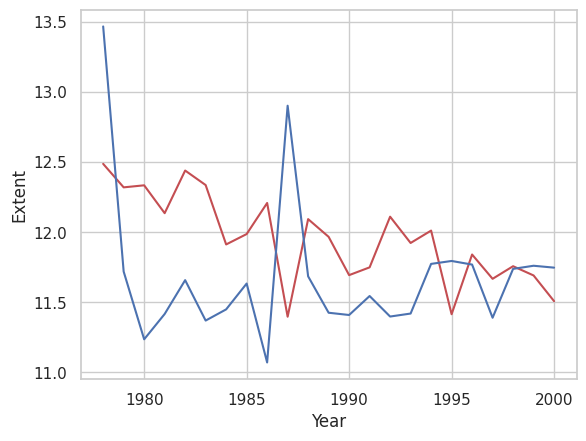

In [ ]:
sns.lineplot(x="Year",y="Extent",data=df_north_mean,color="r")
sns.lineplot(x="Year",y="Extent",data=df_south_mean,color="b")
plt.show()

In [ ]:
#North üzerinden verilerimizi bölelim ve test edelim
y_north=df_north_test["Extent"]
x_north=df_north_test.drop("Extent",axis=1)
xn_train,xn_test,yn_train,yn_test=train_test_split(x_north,y_north,test_size=0.2,random_state=0)

In [ ]:
print(xn_train.shape)
print(yn_train.shape)
print(xn_test.shape)
print(yn_test.shape)

(5161, 5)
(5161,)
(1291, 5)
(1291,)


In [ ]:
lm=LinearRegression()
lm.fit(xn_train,yn_train)
ynhat=lm.predict(xn_test)
print("Egitim datası için skor",lm.score(xn_train,yn_train))
print("Test datası için skor",lm.score(xn_test,yn_test))

Egitim datası için skor 0.42829092041450245
Test datası için skor 0.4363851745813959


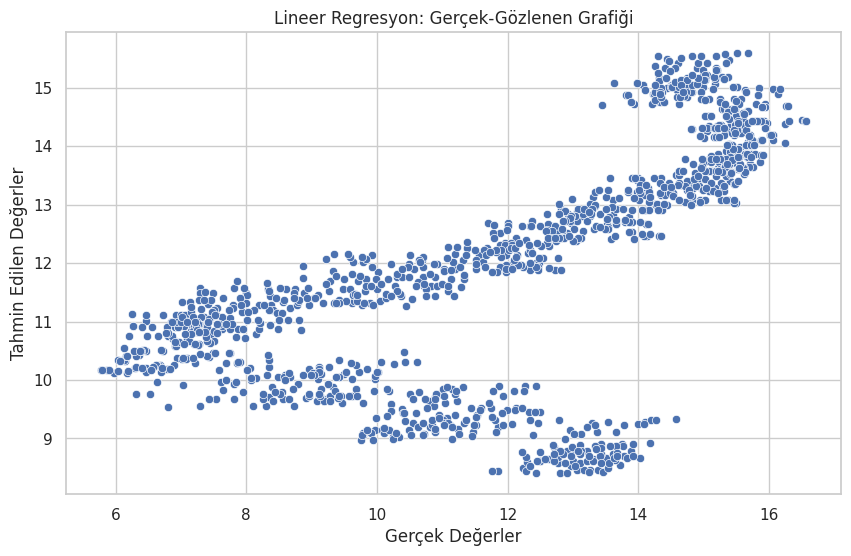

In [ ]:
#Birde sonucumuzu görelim:

plt.figure(figsize=(10, 6))
sns.scatterplot(x=yn_test, y=ynhat)
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin Edilen Değerler")
plt.title("Lineer Regresyon: Gerçek-Gözlenen Grafiği")
plt.show()

In [ ]:
#Verimizi standartaştırarak deneylim:
scaler=StandardScaler()
x_fitted=scaler.fit_transform(xn_train)
xt_fitted=scaler.fit_transform(xn_test)
lm.fit(x_fitted,yn_train)
ynhat=lm.predict(xt_fitted)
print("Egitim datası için skor",lm.score(x_fitted,yn_train))
print("Test datası için skor",lm.score(xt_fitted,yn_test))
r2 = r2_score(yn_test, ynhat)
print("R kare hatası:",r2)
mean = mean_squared_error(yn_test, ynhat)
print("ortalama hata:",mean)
mae = mean_absolute_error(yn_test, ynhat)
print("Mutlak hata:",mae)

Egitim datası için skor 0.4282909204145011
Test datası için skor 0.4364278713268933
R kare hatası: 0.4364278713268933
ortalama hata: 5.094874372899278
Mutlak hata: 1.8013837771147674


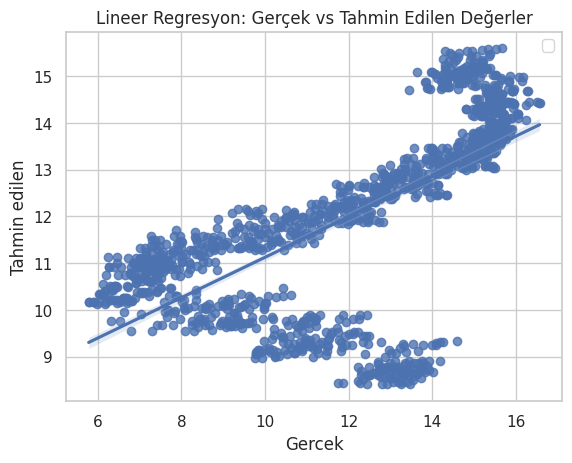

In [ ]:
#Çıkan değerleri görselleştirelim
dff=pd.DataFrame({"Gercek":yn_test,"Tahmin edilen": yhat})
sns.regplot(x="Gercek",y="Tahmin edilen",data=dff)
plt.title('Lineer Regresyon: Gerçek vs Tahmin Edilen Değerler')
plt.legend()
plt.show()

In [ ]:
df

,Year,Month,Day,Extent,Missing,x_north,x_south
0,1978,10,26,10.231,0.0,1,0
1,1978,10,28,10.420,0.0,1,0
2,1978,10,30,10.557,0.0,1,0
3,1978,11,1,10.670,0.0,1,0
4,1978,11,3,10.777,0.0,1,0
...,...,...,...,...,...,...,...
26349,2019,5,27,10.085,0.0,0,1
26350,2019,5,28,10.078,0.0,0,1
26351,2019,5,29,10.219,0.0,0,1
26352,2019,5,30,10.363,0.0,0,1


In [ ]:
#Modelimizi sonuçlandıralım ve 2030-01-01 için tahminleme yapalım.
#En iyi skoru polinomial regression ve KNN algoritmasında elde ettik, dolayısıyla her 2 modeli kullanarak tahminleme yapalım
#Not: knn (ne), polinomiyal regression için (pr) kısaltılması seçilmiştir

predicted_data =np.array([[2030, 1, 23, 0.01, 0, 1]])
sonuc_knn=ne.predict(predicted_data)
#sonuc_lm=lm.predict(predicted_data)
print("KNN algoritmasıyla tahmini Extent miktarı:",sonuc_knn)

KNN algoritmasıyla tahmini Extent miktarı: [6.64977778]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


In [ ]:
dosya=df.to_csv('https://colab.research.google.com/drive/1gIop64mPgEN36mGFn9mHQ7RERDuhhhTm?usp=drive_link', index=False)


In [ ]:
df.to_csv('dosya.csv', index=False)